# Topic: Department Wide Sales Prodiction for  Walmart

#### Importing all required libraries

In [138]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.naive_bayes import GaussianNB

In [139]:
#Loading master and test files

train = pd.read_csv('master.csv')
test=pd.read_csv('test.csv')

In [140]:
#Train data Overview
print( train.info())
print('Shape of the train data:', train.shape )
train.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344667 entries, 0 to 344666
Data columns (total 15 columns):
Store_Dept      344667 non-null object
Date            344667 non-null object
Weekly_Sales    344667 non-null float64
IsHoliday       344667 non-null bool
Temperature     344667 non-null float64
Fuel_Price      344667 non-null float64
MarkDown1       74187 non-null float64
MarkDown2       66068 non-null float64
MarkDown3       68659 non-null float64
MarkDown4       66394 non-null float64
MarkDown5       74529 non-null float64
CPI             344667 non-null float64
Unemployment    344667 non-null float64
Type            344667 non-null object
Size            344667 non-null int64
dtypes: bool(1), float64(10), int64(1), object(3)
memory usage: 37.1+ MB
None
Shape of the train data: (344667, 15)


,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1_1,2/5/10,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1_1,2/12/10,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1_1,2/19/10,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1_1,2/26/10,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1_1,3/5/10,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
5,1_1,3/12/10,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6,1_1,3/19/10,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
7,1_1,3/26/10,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
8,1_1,4/2/10,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
9,1_1,4/9/10,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315


In [141]:
#Test data Overview
print(test.info())
print('Shape of the test data:', test.shape )
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76903 entries, 0 to 76902
Data columns (total 15 columns):
Store_Dept      76903 non-null object
Weekly_Sales    76903 non-null float64
Date            76903 non-null object
IsHoliday       76903 non-null bool
Temperature     76903 non-null float64
Fuel_Price      76903 non-null float64
MarkDown1       76494 non-null float64
MarkDown2       45180 non-null float64
MarkDown3       68432 non-null float64
MarkDown4       68573 non-null float64
MarkDown5       76903 non-null float64
CPI             76903 non-null float64
Unemployment    76903 non-null float64
Type            76903 non-null object
Size            76903 non-null int64
dtypes: bool(1), float64(10), int64(1), object(3)
memory usage: 8.3+ MB
None
Shape of the test data: (76903, 15)


,Store_Dept,Weekly_Sales,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1_1,17147.44,5/4/12,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
1,1_1,18164.20,5/11/12,False,73.77,3.688,8351.40,NaN,10.52,2443.14,3127.88,221.725663,7.143,A,151315
2,1_1,18517.79,5/18/12,False,70.33,3.630,6154.14,NaN,45.11,1675.49,5508.18,221.742674,7.143,A,151315
3,1_1,16963.55,5/25/12,False,77.22,3.561,4039.39,NaN,745.19,1429.96,3631.13,221.744944,7.143,A,151315
4,1_1,16065.49,6/1/12,False,77.95,3.501,6086.21,12.0,370.51,148.75,3690.85,221.747214,7.143,A,151315


### Exploratory Data Analysis

###### Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

In [142]:
train['Date'] = pd.to_datetime(train['Date'], errors='coerce')
#New Features 
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Week']=train['Date'].dt.week
train['Day']=train['Date'].dt.day
train['n_days']=(train['Date'].dt.date-train['Date'].dt.date.min()).apply(lambda x:x.days)
train['Sales_ratio_CPI']=train['Weekly_Sales']/train['CPI']
train['Sales_ratio_Unemploy']=train['Weekly_Sales']/train['Unemployment']
train['Sales_ratio_Tem']=train['Weekly_Sales']/train['Temperature']
train['Sales_ratio_Fuel']=train['Weekly_Sales']/train['Fuel_Price']
train.head()

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Size,Year,Month,Week,Day,n_days,Sales_ratio_CPI,Sales_ratio_Unemploy,Sales_ratio_Tem,Sales_ratio_Fuel
0,1_1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,...,151315,2010,2,5,5,0,118.071672,3074.821120,589.092413,9690.707621
1,1_1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,...,151315,2010,2,6,12,7,217.946493,5679.680484,1195.520384,18068.873626
2,1_1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,...,151315,2010,2,7,19,14,196.865534,5131.452011,1041.711746,16545.564837
3,1_1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,...,151315,2010,2,8,26,21,91.820806,2393.725635,416.117092,7576.548223
4,1_1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,...,151315,2010,3,9,5,28,103.278378,2692.807797,469.417204,8315.390476


In [143]:
test['Date'] = pd.to_datetime(test['Date'], errors='coerce')
#New Features 
test['Year']=test['Date'].dt.year
test['Month']=test['Date'].dt.month
test['Week']=test['Date'].dt.week
test['Day']=test['Date'].dt.day
test['n_days']=(test['Date'].dt.date-test['Date'].dt.date.min()).apply(lambda x:x.days)
test['Sales_ratio_CPI']=test['Weekly_Sales']/test['CPI']
test['Sales_ratio_Unemploy']=test['Weekly_Sales']/test['Unemployment']
test['Sales_ratio_Tem']=test['Weekly_Sales']/test['Temperature']
test['Sales_ratio_Fuel']=test['Weekly_Sales']/test['Fuel_Price']
test.head()

,Store_Dept,Weekly_Sales,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Size,Year,Month,Week,Day,n_days,Sales_ratio_CPI,Sales_ratio_Unemploy,Sales_ratio_Tem,Sales_ratio_Fuel
0,1_1,17147.44,2012-05-04,False,75.55,3.749,21290.13,NaN,69.89,4977.35,...,151315,2012,5,18,4,0,77.355081,2400.593588,226.968101,4573.870365
1,1_1,18164.20,2012-05-11,False,73.77,3.688,8351.40,NaN,10.52,2443.14,...,151315,2012,5,19,11,7,81.921956,2542.937141,246.227464,4925.216920
2,1_1,18517.79,2012-05-18,False,70.33,3.630,6154.14,NaN,45.11,1675.49,...,151315,2012,5,20,18,14,83.510267,2592.438751,263.298592,5101.319559
3,1_1,16963.55,2012-05-25,False,77.22,3.561,4039.39,NaN,745.19,1429.96,...,151315,2012,5,21,25,21,76.500279,2374.849503,219.678192,4763.704016
4,1_1,16065.49,2012-06-01,False,77.95,3.501,6086.21,12.0,370.51,148.75,...,151315,2012,6,22,1,28,72.449569,2249.123618,206.099936,4588.828906


In [144]:
#Dropping Duplicates if any
train.drop_duplicates(inplace=True)
train.shape

(344667, 24)

In [145]:
#Dropping duplicates if any
test.drop_duplicates(inplace=True)
test.shape

(76903, 24)

In [146]:
train.describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Week,Day,n_days,Sales_ratio_CPI,Sales_ratio_Unemploy,Sales_ratio_Tem,Sales_ratio_Fuel
count,344667.000000,344667.000000,344667.000000,74187.000000,66068.000000,68659.000000,66394.000000,74529.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000
mean,16011.033071,57.391070,3.278793,7377.990937,5520.011830,2812.494829,3867.350763,4841.675275,170.260421,8.119909,136807.198011,2010.738461,6.222998,24.781392,15.603171,407.269402,99.765607,2079.282586,319.916280,4974.770000
std,22859.611439,18.644742,0.454502,9695.184239,11806.737391,13457.720905,8176.212908,5046.201077,38.767201,1.865077,60944.571069,0.697408,3.458568,15.046949,8.753912,236.723235,147.630628,3078.137071,532.492758,7196.840546
min,-4988.940000,-2.060000,2.472000,0.500000,-265.760000,-1.000000,0.460000,135.160000,126.064000,4.125000,34875.000000,2010.000000,1.000000,1.000000,1.000000,0.000000,-39.507229,-451.865500,-27130.932039,-1655.804846
25%,2100.335000,43.820000,2.843000,1842.420000,96.520000,5.900000,319.840000,1844.030000,131.940807,7.082000,93638.000000,2010.000000,3.000000,12.000000,8.000000,203.000000,12.117060,264.445582,38.649191,642.666859
50%,7638.860000,58.060000,3.263000,4879.040000,1053.980000,35.490000,1100.930000,3429.820000,182.238988,7.951000,140167.000000,2011.000000,6.000000,23.000000,16.000000,406.000000,45.582647,958.232754,139.308460,2342.481752
75%,20179.490000,71.240000,3.669000,9006.210000,5524.490000,203.990000,3380.280000,5996.690000,211.406287,8.622000,202505.000000,2011.000000,9.000000,38.000000,23.000000,616.000000,124.794207,2565.433713,387.303595,6230.318999
max,693099.360000,100.140000,4.294000,88646.760000,104519.540000,141630.610000,67474.850000,37581.270000,225.367254,14.313000,219622.000000,2012.000000,12.000000,52.000000,31.000000,812.000000,5471.724737,80137.057404,17550.223827,219196.508539


In [147]:
test.describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Week,Day,n_days,Sales_ratio_CPI,Sales_ratio_Unemploy,Sales_ratio_Tem,Sales_ratio_Fuel
count,76903.000000,76903.000000,76903.000000,76494.000000,45180.000000,68432.000000,68573.000000,76903.000000,76903.000000,76903.000000,76903.000000,76903.0,76903.000000,76903.000000,76903.000000,76903.000000,76903.000000,76903.000000,76903.000000,76903.000000
mean,15847.811551,72.186496,3.729583,7118.817527,138.880550,61.793233,2914.371305,4422.840950,175.421718,7.244896,136372.585218,2012.0,7.464702,30.511944,15.986685,87.583605,96.037310,2351.397455,224.993017,4270.597140
std,22033.324816,11.341844,0.245999,6649.927114,175.823273,123.606109,3571.788561,6726.848629,40.603254,1.678145,61140.858121,0.0,1.670210,7.503094,8.745106,52.521655,138.545429,3523.277660,316.316077,5977.320651
min,-771.900000,39.380000,3.187000,0.270000,-192.000000,-29.100000,0.220000,164.080000,130.683000,3.879000,34875.000000,2012.0,5.000000,18.000000,1.000000,0.000000,-5.424052,-87.328883,-10.584122,-201.330203
25%,1991.910000,64.750000,3.570000,2639.320000,22.000000,4.550000,765.650000,1891.770000,138.088267,6.170000,93638.000000,2012.0,6.000000,24.000000,8.000000,42.000000,11.247712,275.040105,28.284062,536.374915
50%,7497.940000,73.400000,3.717000,5817.030000,77.840000,18.650000,1770.010000,3275.950000,191.002810,7.139000,140167.000000,2012.0,8.000000,31.000000,15.000000,91.000000,43.382904,1047.752289,105.140584,2014.221549
75%,20303.380000,80.880000,3.886000,9422.600000,189.600000,63.400000,3648.330000,5288.610000,221.380331,8.243000,202505.000000,2012.0,9.000000,37.000000,24.000000,133.000000,121.699711,2890.970322,288.314765,5457.502975
max,206575.900000,100.070000,4.468000,48280.910000,1314.000000,1095.850000,25656.340000,108519.280000,227.232807,11.627000,219622.000000,2012.0,10.000000,43.000000,31.000000,175.000000,1421.125558,48021.392111,4049.493644,55997.804283


##### Checking for missing data


In [148]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [149]:
missing_data(train)

,Total,Percent
MarkDown2,278599,80.831353
MarkDown4,278273,80.736769
MarkDown3,276008,80.079613
MarkDown1,270480,78.475746
MarkDown5,270138,78.376520
Sales_ratio_Fuel,0,0.000000
Sales_ratio_Tem,0,0.000000
Date,0,0.000000
Weekly_Sales,0,0.000000
IsHoliday,0,0.000000


When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models or functions that can handle missing values with  imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

In [150]:
missing_data(test)

,Total,Percent
MarkDown2,31723,41.250666
MarkDown3,8471,11.015175
MarkDown4,8330,10.831827
MarkDown1,409,0.531839
Sales_ratio_Fuel,0,0.000000
Sales_ratio_Tem,0,0.000000
Weekly_Sales,0,0.000000
Date,0,0.000000
IsHoliday,0,0.000000
Temperature,0,0.000000


Let's now look at the number of unique entries in each of the categorical columns.

In [151]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Store_Dept    3313
Type             3
dtype: int64

In [152]:
# Number of unique classes in each object column
test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Store_Dept    3161
Type             3
dtype: int64

### Feature analysis 

In [153]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train[feature].dropna(),color=color, kde=True,bins=75)
    plt.show()   

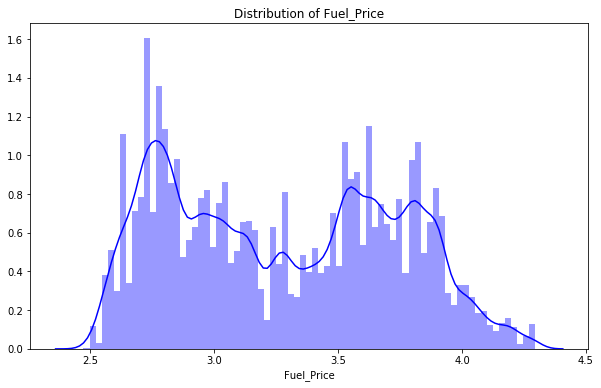

In [154]:
plot_distribution('Fuel_Price', 'blue')

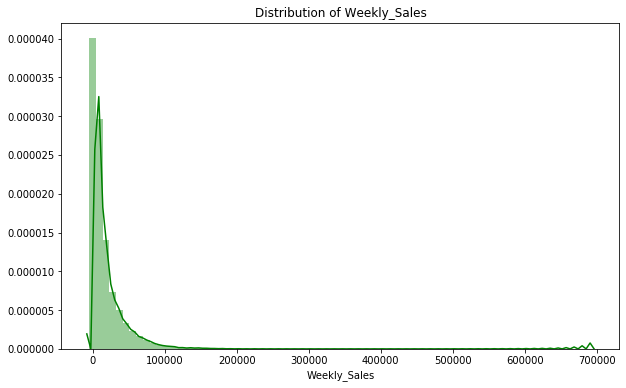

In [155]:
plot_distribution('Weekly_Sales', 'green')

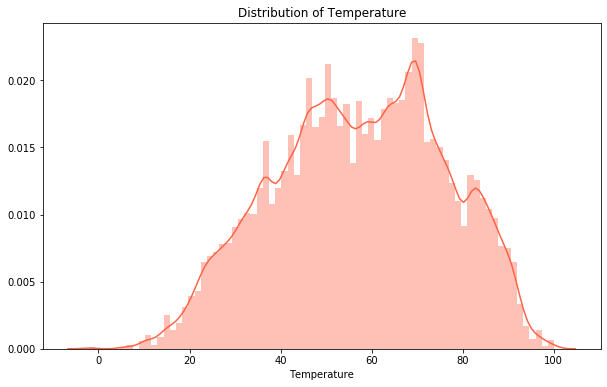

In [156]:
plot_distribution('Temperature', 'tomato')

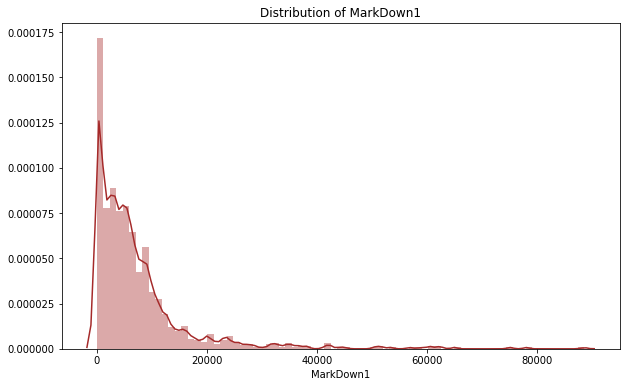

In [157]:
plot_distribution('MarkDown1', 'brown')

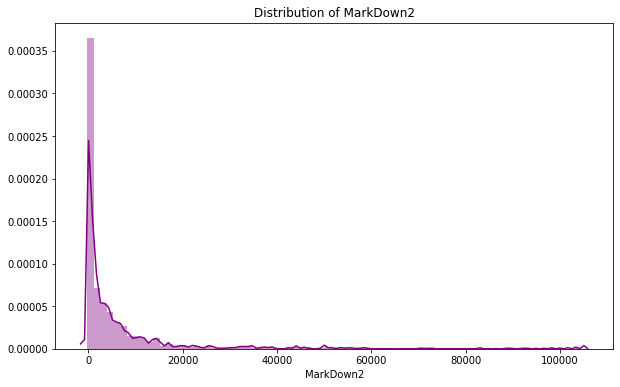

In [158]:
plot_distribution('MarkDown2', 'purple')

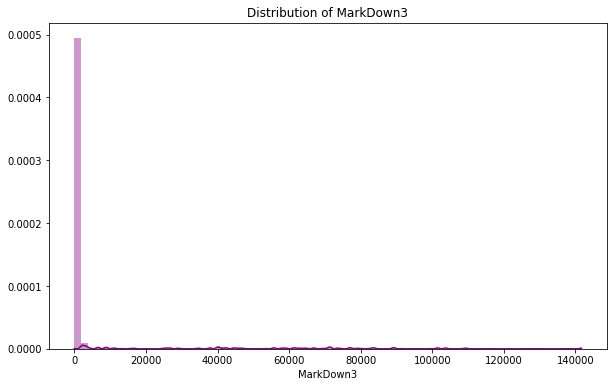

In [159]:
plot_distribution('MarkDown3', 'purple')

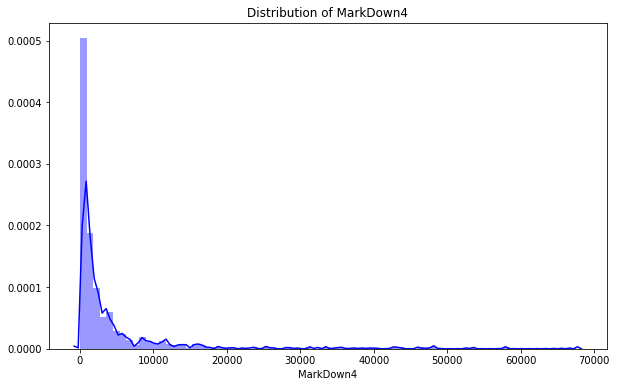

In [160]:
plot_distribution('MarkDown4', 'blue')

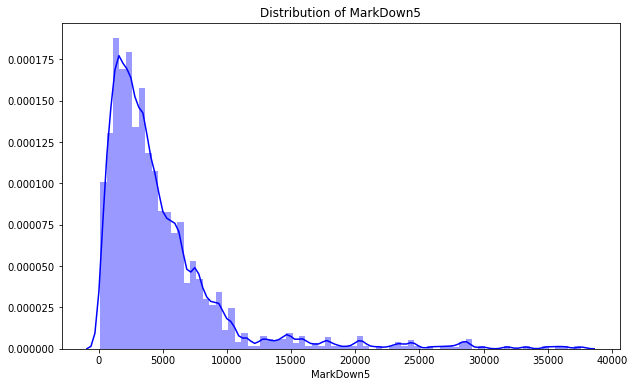

In [161]:
plot_distribution('MarkDown5', 'blue')

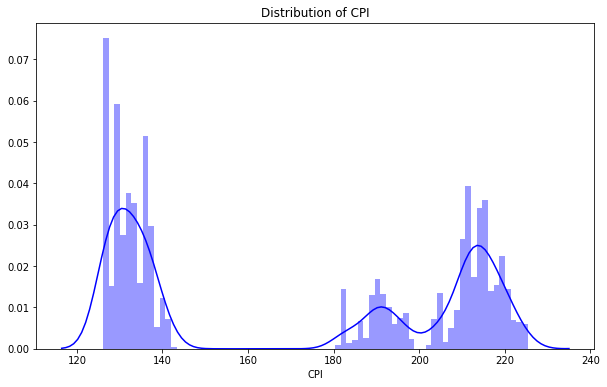

In [162]:
plot_distribution('CPI', 'blue')

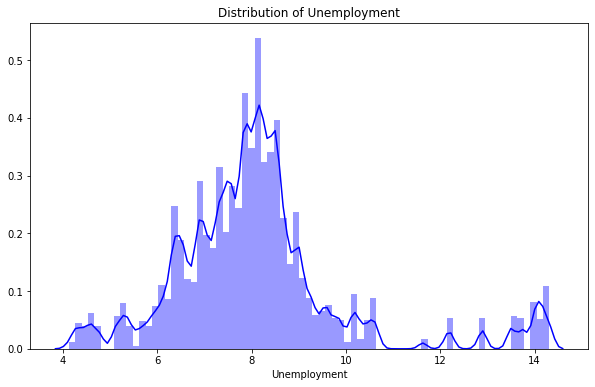

In [163]:
plot_distribution('Unemployment', 'blue')

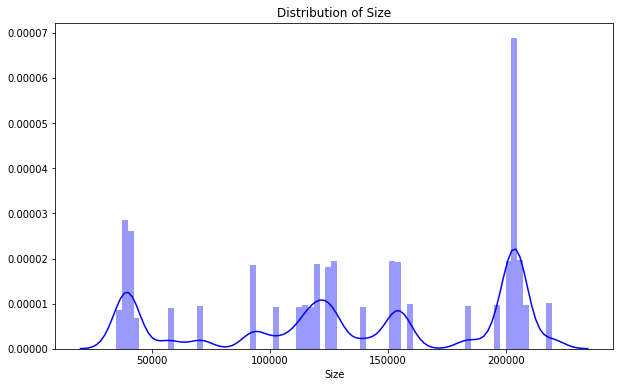

In [164]:
plot_distribution('Size', 'blue')

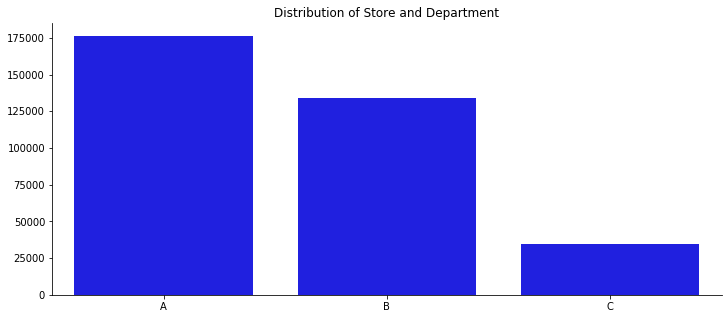

In [165]:
t = train["Type"].value_counts()
t1 = pd.DataFrame()
t1['x'] = t.index 
t1['y'] = t.values 

plt.figure(figsize=(12,5));
plt.title("Distribution of Store and Department");
ax = sns.barplot(data=t1, x="x", y="y", color="blue");
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

ax.set_ylabel('');    
ax.set_xlabel('');

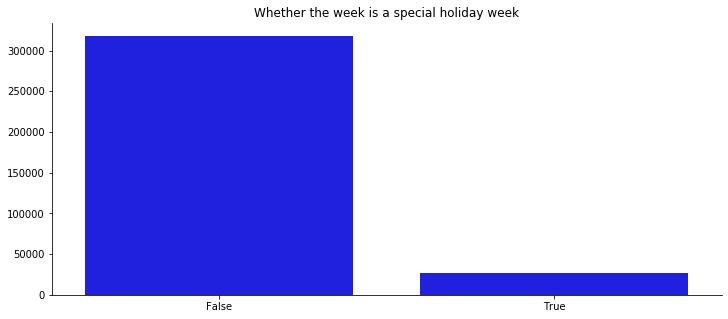

In [166]:
t = train["IsHoliday"].value_counts()
t1 = pd.DataFrame()
t1['x'] = t.index 
t1['y'] = t.values 

plt.figure(figsize=(12,5));
plt.title("Whether the week is a special holiday week");
ax = sns.barplot(data=t1, x="x", y="y", color="blue");
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

ax.set_ylabel('');    
ax.set_xlabel('');

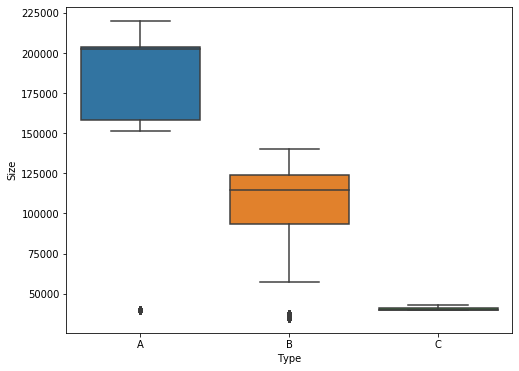

In [167]:

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=train)

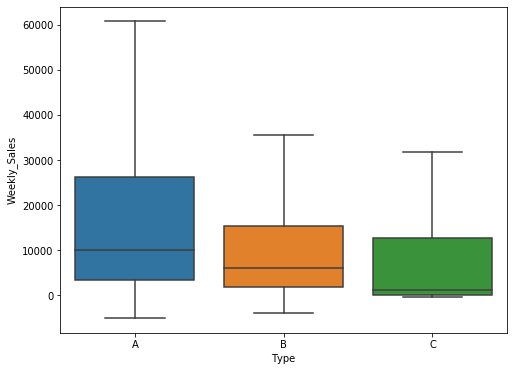

In [168]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=train, showfliers=False)

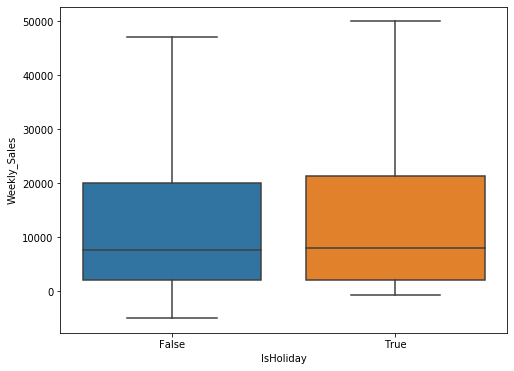

In [169]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train, showfliers=False)

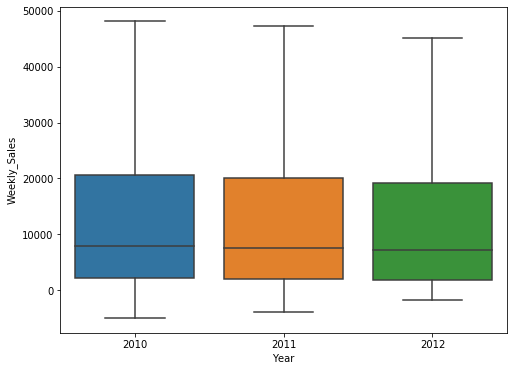

In [170]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Year', y='Weekly_Sales', data=train, showfliers=False)

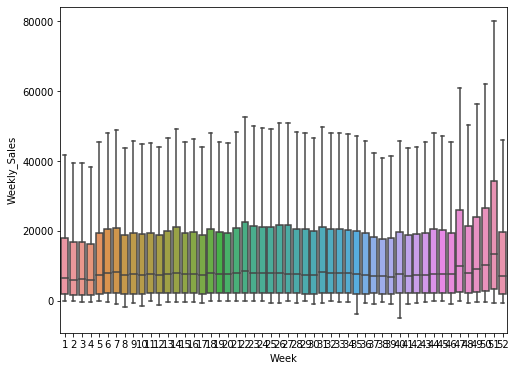

In [171]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Week', y='Weekly_Sales', data=train, showfliers=False)

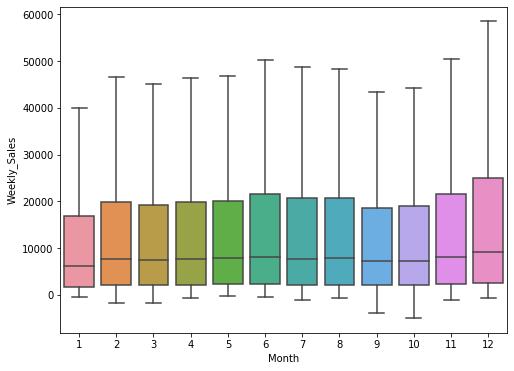

In [172]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y='Weekly_Sales', data=train, showfliers=False)

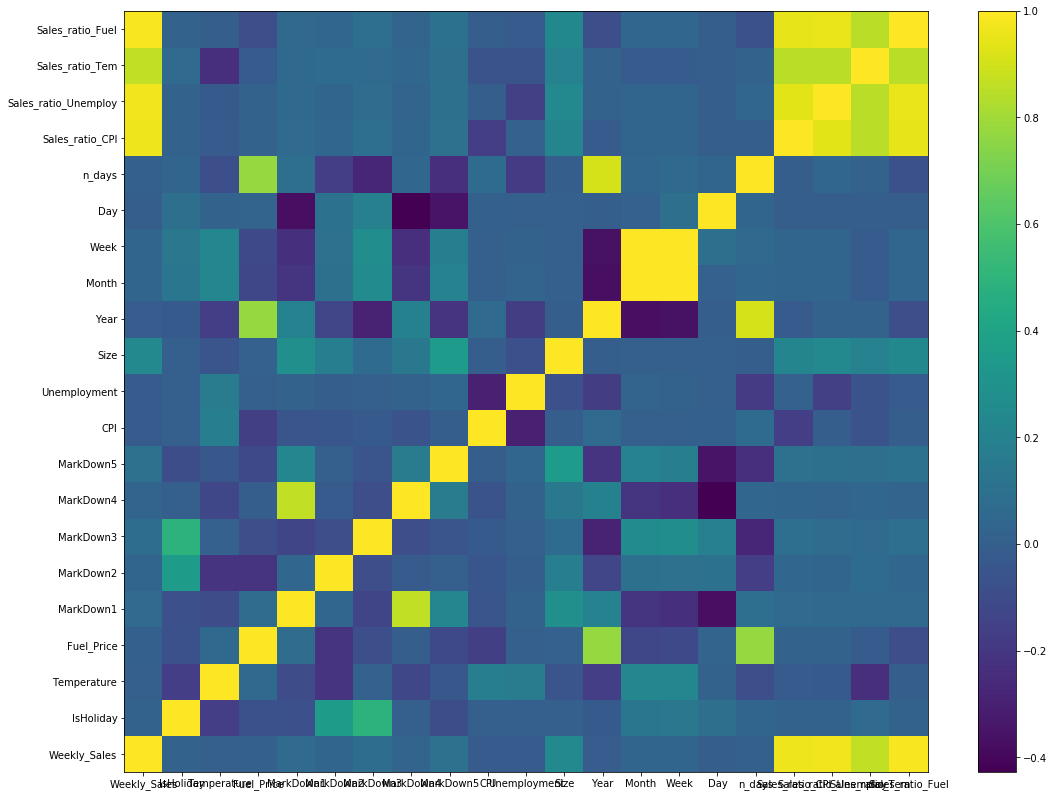

In [173]:
#Correlation
fig = plt.figure(figsize=(18, 14))
corr = train.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

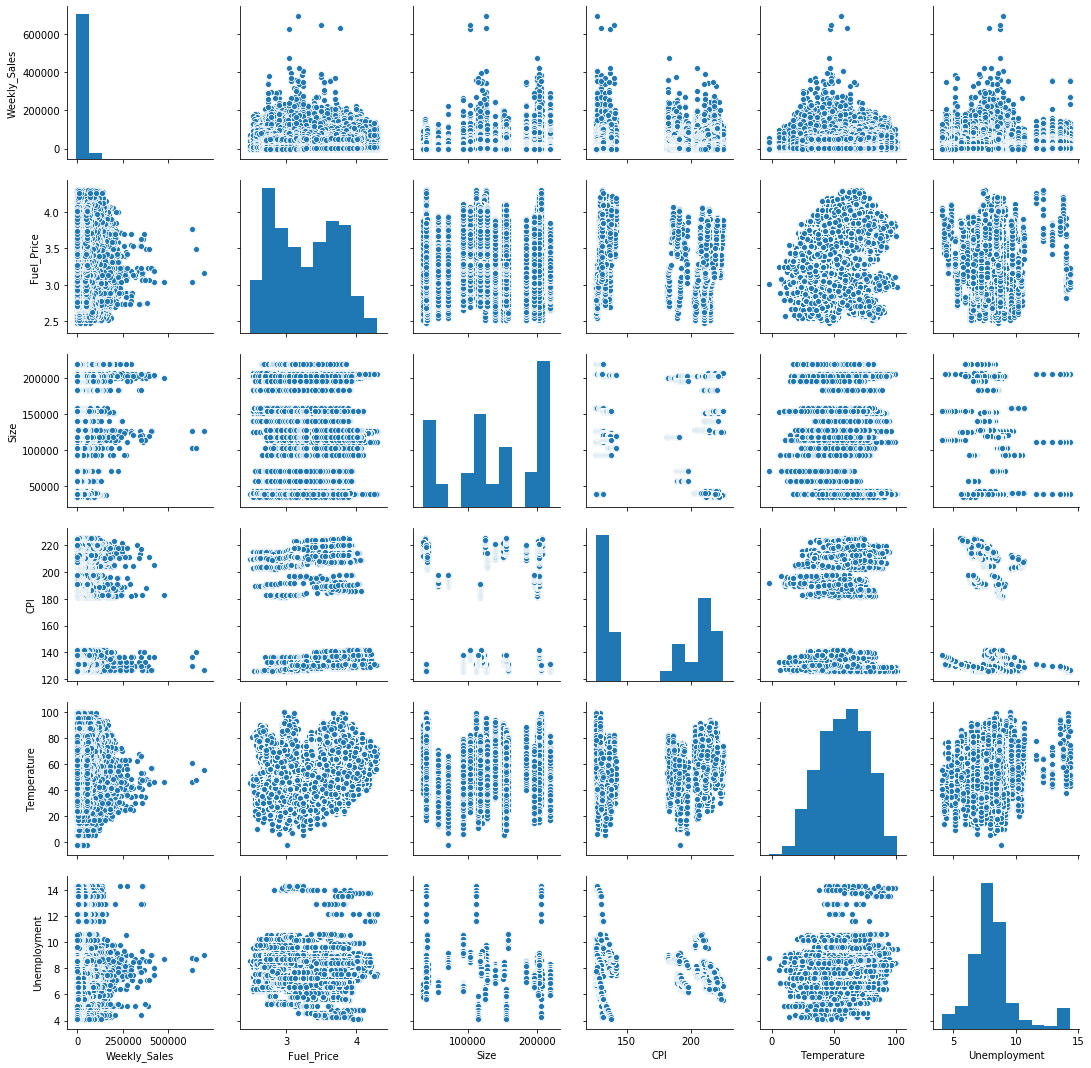

In [130]:
#sns.pairplot(train, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Temperature', 'Unemployment'])

## Part 1 Supervised Learning (Regression)

In [174]:
#Handling missing values
# fill missing values with mean column values
train.fillna(train.mean(), inplace=True)
# count the number of NaN values in each column
print(train.isnull().sum())

Store_Dept              0
Date                    0
Weekly_Sales            0
IsHoliday               0
Temperature             0
Fuel_Price              0
MarkDown1               0
MarkDown2               0
MarkDown3               0
MarkDown4               0
MarkDown5               0
CPI                     0
Unemployment            0
Type                    0
Size                    0
Year                    0
Month                   0
Week                    0
Day                     0
n_days                  0
Sales_ratio_CPI         0
Sales_ratio_Unemploy    0
Sales_ratio_Tem         0
Sales_ratio_Fuel        0
dtype: int64


In [175]:
#Handling missing values
# fill missing values with mean column values
test.fillna(test.mean(), inplace=True)
# count the number of NaN values in each column
print(test.isnull().sum())

Store_Dept              0
Weekly_Sales            0
Date                    0
IsHoliday               0
Temperature             0
Fuel_Price              0
MarkDown1               0
MarkDown2               0
MarkDown3               0
MarkDown4               0
MarkDown5               0
CPI                     0
Unemployment            0
Type                    0
Size                    0
Year                    0
Month                   0
Week                    0
Day                     0
n_days                  0
Sales_ratio_CPI         0
Sales_ratio_Unemploy    0
Sales_ratio_Tem         0
Sales_ratio_Fuel        0
dtype: int64


In [176]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = preprocessing.LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = preprocessing.LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [177]:
train=MultiColumnLabelEncoder(columns = ['IsHoliday','Type']).fit_transform(train)
train.head()

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Size,Year,Month,Week,Day,n_days,Sales_ratio_CPI,Sales_ratio_Unemploy,Sales_ratio_Tem,Sales_ratio_Fuel
0,1_1,2010-02-05,24924.50,0,42.31,2.572,7377.990937,5520.01183,2812.494829,3867.350763,...,151315,2010,2,5,5,0,118.071672,3074.821120,589.092413,9690.707621
1,1_1,2010-02-12,46039.49,1,38.51,2.548,7377.990937,5520.01183,2812.494829,3867.350763,...,151315,2010,2,6,12,7,217.946493,5679.680484,1195.520384,18068.873626
2,1_1,2010-02-19,41595.55,0,39.93,2.514,7377.990937,5520.01183,2812.494829,3867.350763,...,151315,2010,2,7,19,14,196.865534,5131.452011,1041.711746,16545.564837
3,1_1,2010-02-26,19403.54,0,46.63,2.561,7377.990937,5520.01183,2812.494829,3867.350763,...,151315,2010,2,8,26,21,91.820806,2393.725635,416.117092,7576.548223
4,1_1,2010-03-05,21827.90,0,46.50,2.625,7377.990937,5520.01183,2812.494829,3867.350763,...,151315,2010,3,9,5,28,103.278378,2692.807797,469.417204,8315.390476


In [178]:
test=MultiColumnLabelEncoder(columns = ['IsHoliday','Type']).fit_transform(test)
test.head()

,Store_Dept,Weekly_Sales,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Size,Year,Month,Week,Day,n_days,Sales_ratio_CPI,Sales_ratio_Unemploy,Sales_ratio_Tem,Sales_ratio_Fuel
0,1_1,17147.44,2012-05-04,0,75.55,3.749,21290.13,138.88055,69.89,4977.35,...,151315,2012,5,18,4,0,77.355081,2400.593588,226.968101,4573.870365
1,1_1,18164.20,2012-05-11,0,73.77,3.688,8351.40,138.88055,10.52,2443.14,...,151315,2012,5,19,11,7,81.921956,2542.937141,246.227464,4925.216920
2,1_1,18517.79,2012-05-18,0,70.33,3.630,6154.14,138.88055,45.11,1675.49,...,151315,2012,5,20,18,14,83.510267,2592.438751,263.298592,5101.319559
3,1_1,16963.55,2012-05-25,0,77.22,3.561,4039.39,138.88055,745.19,1429.96,...,151315,2012,5,21,25,21,76.500279,2374.849503,219.678192,4763.704016
4,1_1,16065.49,2012-06-01,0,77.95,3.501,6086.21,12.00000,370.51,148.75,...,151315,2012,6,22,1,28,72.449569,2249.123618,206.099936,4588.828906


In [179]:
train_reg= train.drop(columns=['Date','Store_Dept',  'Year', 'Month', 'Week', 'Day', 'n_days'])
test_reg=test.drop(columns=['Date','Store_Dept',  'Year', 'Month', 'Week', 'Day', 'n_days'])

In [180]:
#Seperating target and predictors
X1 = train_reg.drop(columns=['Weekly_Sales'])
y1 = train_reg[['Weekly_Sales']]

print(X1.shape, y1.shape)

(344667, 16) (344667, 1)


In [199]:
#Seperating target and predictors
X = test_reg.drop(columns=['Weekly_Sales'])
y = test_reg[['Weekly_Sales']]

print(X.shape, y.shape)

(76903, 16) (76903, 1)


##### Linear Regression

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [201]:

#1
print("Linear Regression")
#initialize linear regression model
lr = LinearRegression()
#fit training set to your LR model
lr2 = lr.fit(X_train, y_train)


# The coefficients
print('Coefficients:',lr2.coef_)


Linear Regression
Coefficients: [[-7.29174598e+01 -4.81859942e+00  2.60855025e+03  2.01257860e-02
   3.78373223e-03  8.14624052e-03 -1.83642871e-02  1.56910065e-02
   2.42767695e+01  4.29377938e+02 -7.23994805e+01  5.12927038e-04
   3.37239327e+01  1.76398324e+00  5.29882815e-02  1.77404361e+00]]


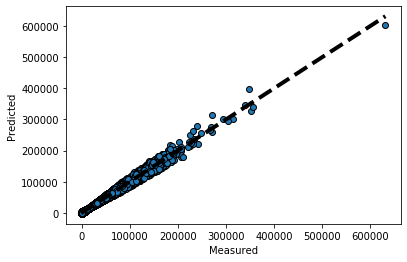

In [202]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()


# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [203]:
#predict on the test set using  model
y_pred = lr2.predict(X)



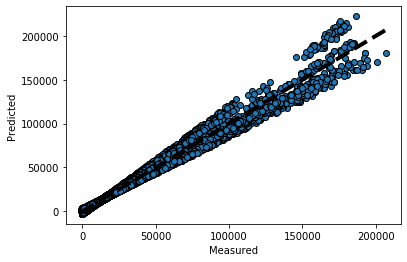

In [204]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [205]:
#evaluate: use MSE
from sklearn.metrics import median_absolute_error
print("MSE for LR: %.2f" %mean_squared_error(y, y_pred))
print('R Square: %.2f' %r2_score(y, y_pred))
print('Median_absolute_error: %.2f' %median_absolute_error(y, y_pred))

MSE for LR: 5912665.42
R Square: 0.99
Median_absolute_error: 886.80


In [206]:
#scores = cross_val_score(nb, X, y, cv=10, scoring=scoring)
print("Mean Squared error: %0.2f (+/- %0.2f)" % (cross_val_score(lr2, X_test, y_test, cv=10, scoring='neg_mean_squared_error').mean(), cross_val_score(lr2, X1, y1, cv=10, scoring='neg_mean_squared_error').std() * 2))
print("R Square: %0.2f (+/- %0.2f)" % (cross_val_score(lr2, X_test, y_test, cv=10, scoring='r2').mean(), cross_val_score(lr2, X1, y1, cv=10, scoring='r2').std() * 2))

Mean Squared error: -4340479.75 (+/- 5133017.07)
R Square: 0.99 (+/- 0.01)


##### KNN Regression

In [207]:
#print("KNN")
knn = KNeighborsRegressor()
knn = knn.fit(X_train, y_train)


In [208]:
#scores = cross_val_score(nb, X, y, cv=10, scoring=scoring)
print("Mean Squared error: %0.2f (+/- %0.2f)" % (cross_val_score(knn, X_test, y_test, cv=10, scoring='neg_mean_squared_error').mean(), cross_val_score(lr2, X1, y1, cv=10, scoring='neg_mean_squared_error').std() * 2))
print("R Square: %0.2f (+/- %0.2f)" % (cross_val_score(knn, X_test, y_test, cv=10, scoring='r2').mean(), cross_val_score(lr2, X1, y1, cv=10, scoring='r2').std() * 2))

Mean Squared error: -8680727.90 (+/- 5133017.07)
R Square: 0.98 (+/- 0.01)


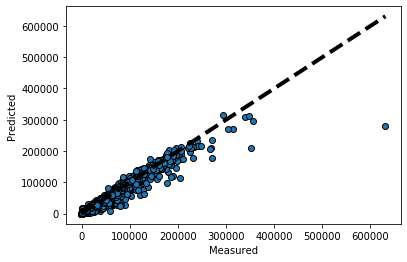

In [209]:
predicted = cross_val_predict(knn, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [210]:
y_pred1 = knn.predict(X)
print("MSE for KNN: %.2f" %mean_squared_error(y,y_pred1))
print('R Square: %.2f' %r2_score(y, y_pred1))


MSE for KNN: 5470579.89
R Square: 0.99


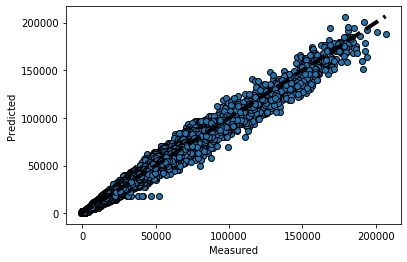

In [211]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred1, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [212]:
train.corr()

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Size,Year,Month,Week,Day,n_days,Sales_ratio_CPI,Sales_ratio_Unemploy,Sales_ratio_Tem,Sales_ratio_Fuel
Weekly_Sales,1.000000,0.014033,-0.002499,0.002062,0.028687,0.015769,0.038408,0.012009,0.050267,-0.020811,...,0.242486,-0.011684,0.034062,0.033569,-0.004851,0.002407,0.964498,0.969857,0.862301,0.986788
IsHoliday,0.014033,1.000000,-0.168885,-0.074035,-0.044122,0.195923,0.268337,-0.001673,-0.054605,0.001065,...,0.000459,-0.027877,0.130626,0.139447,0.087415,0.032151,0.013627,0.013450,0.058808,0.019842
Temperature,-0.002499,-0.168885,1.000000,0.057290,-0.033071,-0.065681,0.003186,-0.038849,-0.014176,0.179387,...,-0.057018,-0.170845,0.227380,0.225101,0.022626,-0.083053,-0.025519,-0.026479,-0.236630,-0.004580
Fuel_Price,0.002062,-0.074035,0.057290,1.000000,0.021986,-0.063577,-0.026223,-0.001724,-0.036446,-0.160191,...,0.007537,0.771927,-0.122541,-0.115285,0.028447,0.776501,0.022691,0.014420,-0.019607,-0.091780
MarkDown1,0.028687,-0.044122,-0.033071,0.021986,1.000000,0.040979,-0.131557,0.837338,0.229639,-0.023983,...,0.132587,0.062341,-0.119256,-0.132320,-0.171066,0.007978,0.028981,0.028471,0.029296,0.022924
MarkDown2,0.015769,0.195923,-0.065681,-0.063577,0.040979,1.000000,-0.088376,-0.022755,-0.002763,-0.019883,...,0.074708,-0.037126,0.051388,0.055076,0.046152,-0.015308,0.017058,0.017020,0.033563,0.019834
MarkDown3,0.038408,0.268337,0.003186,-0.026223,-0.131557,-0.088376,1.000000,-0.089157,-0.051358,-0.013856,...,0.030041,-0.087206,0.144792,0.150963,0.082772,-0.026347,0.039767,0.039337,0.031080,0.037125
MarkDown4,0.012009,-0.001673,-0.038849,-0.001724,0.837338,-0.022755,-0.089157,1.000000,0.158086,-0.027333,...,0.055357,0.056982,-0.114887,-0.129171,-0.186109,0.003632,0.014525,0.012953,0.020376,0.010530
MarkDown5,0.050267,-0.054605,-0.014176,-0.036446,0.229639,-0.002763,-0.051358,0.158086,1.000000,-0.002179,...,0.162542,-0.066005,0.121100,0.107153,-0.161717,-0.023105,0.047349,0.050273,0.046662,0.048356
CPI,-0.020811,0.001065,0.179387,-0.160191,-0.023983,-0.019883,-0.013856,-0.027333,-0.002179,1.000000,...,-0.004530,0.061303,-0.003573,-0.002886,0.001983,0.064455,-0.170377,-0.007250,-0.063699,-0.006643


### Part 2   Supervised Learning (Classification)  

In [213]:
train_clf=train.drop(columns=['Date', 'n_days'])
test_clf=test.drop(columns=['Date', 'n_days'])

In [214]:
train_clf=MultiColumnLabelEncoder(columns = ['Store_Dept','Year', 'Month', 'Week', 'Day']).fit_transform(train_clf)
test_clf=MultiColumnLabelEncoder(columns = ['Store_Dept','Year', 'Month', 'Week', 'Day']).fit_transform(test_clf)

In [215]:
#Seperating target and predictors
X_clf = train_clf.drop(columns=['Type'])
y_clf = train_clf[['Type']]

print(X_clf.shape, y_clf.shape)

#Seperating target and predictors test
X = test_clf.drop(columns=['Type'])
y = test_clf[['Type']]

print(X.shape, y.shape)

(344667, 21) (344667, 1)
(76903, 21) (76903, 1)


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=1)

###### Decision Tree

In [217]:
#Decision Tree Classifier
print("Decision Tree Classifier")
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

Decision Tree Classifier


In [218]:
#Repeat the same steps for DecisionTree Classifier Cross Validation
print("Decision Tree Classifier")
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(dt, X_test, y_test, cv=10, scoring='precision_weighted').mean(), cross_val_score(dt, X_test, y_test, cv=10, scoring='precision_weighted').std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(dt, X_test, y_test, cv=10, scoring='recall_weighted').mean(), cross_val_score(dt, X_test, y_test, cv=10, scoring='recall_weighted').std() * 2))
print("F1-score: %0.2f (+/- %0.2f)" % (cross_val_score(dt, X_test, y_test, cv=10, scoring='f1_weighted').mean(), cross_val_score(dt, X_test, y_test, cv=10, scoring='f1_weighted').std() * 2))

Decision Tree Classifier
Precision: 1.00 (+/- 0.00)
Recall: 1.00 (+/- 0.00)
F1-score: 1.00 (+/- 0.00)


In [219]:
#DT Scores
y_pred = dt.predict(X)

#compare y_pred with actual targets for your test set(y_test) and calculate precision, recall, f1-score
print("Precision: %0.2f" %precision_score(y, y_pred , average="macro"))
print("Recall:  %0.2f" %recall_score(y, y_pred , average="macro"))
print("F1-score:  %0.2f" %f1_score(y, y_pred , average="macro"))

Precision: 0.97
Recall:  0.91
F1-score:  0.93


In [220]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[38991     0   208]
 [    0 29743     0]
 [ 2183     0  5778]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     39199
           1       1.00      1.00      1.00     29743
           2       0.97      0.73      0.83      7961

    accuracy                           0.97     76903
   macro avg       0.97      0.91      0.93     76903
weighted avg       0.97      0.97      0.97     76903



#### Naive Bayes

In [222]:
#initialize your classifier
print("Naive-Bayes Classifier")
nb = GaussianNB()

#fit your classifier to training set
nb = nb.fit(X_train, y_train)

Naive-Bayes Classifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [223]:
#Repeat the same steps for Naive Bayes Cross Validation
print("Naive-Bayes Classifier")
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(nb, X_test, y_test, cv=10, scoring='precision_weighted').mean(), cross_val_score(nb, X_test, y_test, cv=10, scoring='precision_weighted').std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(nb, X_test, y_test, cv=10, scoring='recall_weighted').mean(), cross_val_score(nb, X_test, y_test, cv=10, scoring='recall_weighted').std() * 2))
print("F1-score: %0.2f (+/- %0.2f)" % (cross_val_score(nb, X_test, y_test, cv=10, scoring='f1_weighted').mean(), cross_val_score(nb, X_test, y_test, cv=10, scoring='f1_weighted').std() * 2))

Decision Tree Classifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Precision: 0.82 (+/- 0.01)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Recall: 0.80 (+/- 0.01)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

F1-score: 0.81 (+/- 0.01)


In [224]:
y_pred = nb.predict(X)
#compare y_pred with actual targets for your test set(y_test) and calculate precision, recall, f1-score
print("Precision: %0.2f" %precision_score(y, y_pred , average="macro"))
print("Recall:  %0.2f" %recall_score(y, y_pred , average="macro"))
print("F1-score:  %0.2f" %f1_score(y, y_pred , average="macro"))
#compute recall and f1-score

Precision: 0.79
Recall:  0.79
F1-score:  0.78


In [225]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[30243  7007  1949]
 [ 2862 26593   288]
 [  408  2052  5501]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83     39199
           1       0.75      0.89      0.81     29743
           2       0.71      0.69      0.70      7961

    accuracy                           0.81     76903
   macro avg       0.79      0.79      0.78     76903
weighted avg       0.82      0.81      0.81     76903



##### Random Forest

In [226]:
from sklearn.ensemble import RandomForestClassifier
print("Random Forest")
rf=RandomForestClassifier()
rf = rf.fit(X_train, y_train)

Random Forest


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [227]:
#Repeat the same steps for DecisionTree Classifier Cross Validation
print("Random Forest Classifier")
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(rf, X_test, y_test, cv=10, scoring='precision_weighted').mean(), cross_val_score(rf, X_test, y_test, cv=10, scoring='precision_weighted').std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(rf, X_test, y_test, cv=10, scoring='recall_weighted').mean(), cross_val_score(rf, X_test, y_test, cv=10, scoring='recall_weighted').std() * 2))
print("F1-score: %0.2f (+/- %0.2f)" % (cross_val_score(rf, X_test, y_test, cv=10, scoring='f1_weighted').mean(), cross_val_score(rf, X_test, y_test, cv=10, scoring='f1_weighted').std() * 2))

Random Forest Classifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

Precision: 1.00 (+/- 0.00)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

Recall: 1.00 (+/- 0.00)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

F1-score: 1.00 (+/- 0.00)


In [228]:
y_pred = rf.predict(X)
#compare y_pred with actual targets for your test set(y_test) and calculate precision, recall, f1-score
print("Precision: %0.2f" %precision_score(y, y_pred , average="macro"))
print("Recall:  %0.2f" %recall_score(y, y_pred , average="macro"))
print("F1-score:  %0.2f" %f1_score(y, y_pred , average="macro"))
#compute recall and f1-score

Precision: 0.98
Recall:  0.92
F1-score:  0.95


In [229]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[39104    70    25]
 [  102 29618    23]
 [ 1435   305  6221]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     39199
           1       0.99      1.00      0.99     29743
           2       0.99      0.78      0.87      7961

    accuracy                           0.97     76903
   macro avg       0.98      0.92      0.95     76903
weighted avg       0.98      0.97      0.97     76903



In [230]:
print(rf.feature_importances_)

[1.75622120e-01 6.73699802e-03 6.85173895e-05 9.72024460e-03
 6.42584538e-03 8.53727074e-03 1.44821754e-03 3.00474096e-03
 2.40774048e-03 7.00345416e-03 6.68466272e-02 7.48664878e-02
 5.90833289e-01 2.17386757e-03 2.45845459e-03 3.02544115e-03
 9.72390459e-04 8.62686109e-03 9.46356705e-03 9.83314178e-03
 9.92472287e-03]


Text(0.5, 0, 'Relative Importance')

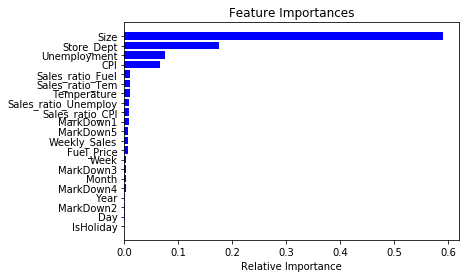

In [231]:
features=X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [232]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=15, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
   
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except ( ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

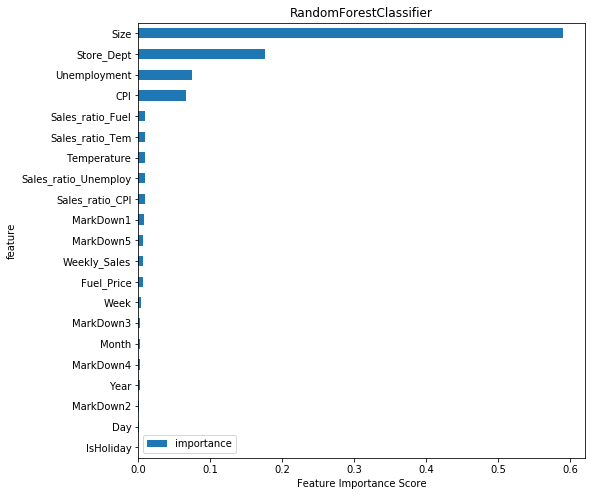

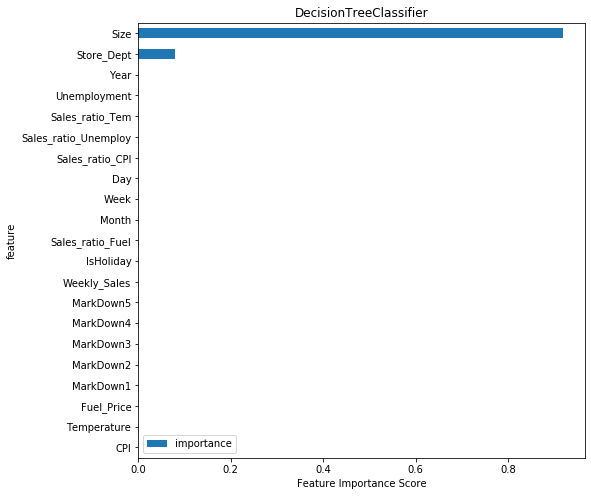

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


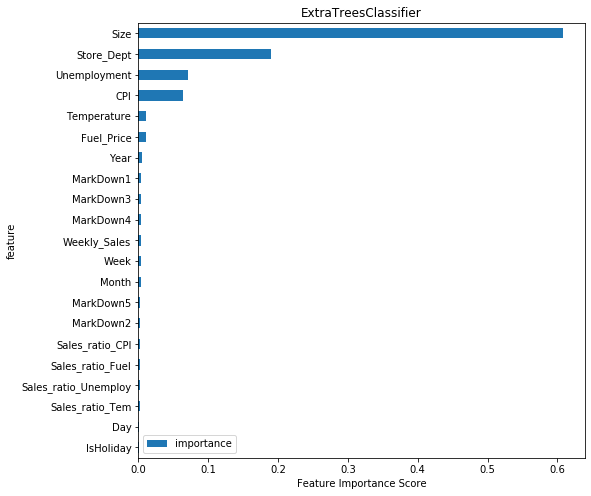

GaussianNB does not have feature_importances_ attribute


In [233]:
from sklearn.ensemble     import ExtraTreesClassifier
clfs=[rf,dt, ExtraTreesClassifier(), nb, ]

for clf in clfs:
    try:
        _ = plot_feature_importances(clf, X_train, y_train, top_n=X_train.shape[1], title=clf.__class__.__name__)
    except AttributeError as e:
        print(e)
#plot_feature_importances(rf, X_train, y_train=None, 
                             #top_n=10, figsize=(8,8), print_table=False, title="Feature Importances")

#### Part 3: Unsupervised Learning (Clustering)

In [234]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [235]:
mms = MinMaxScaler()
mms.fit(train_clf)
data_transformed = mms.transform(train_clf)

In [236]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

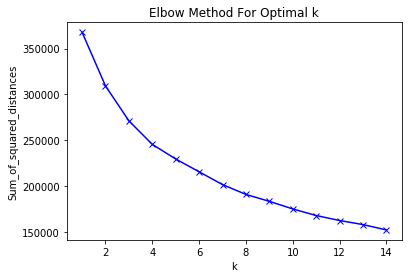

In [237]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [238]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(data_transformed)

In [239]:
kmeans.predict(test_clf)

array([6, 6, 6, ..., 6, 6, 6])

In [241]:
kmeans.cluster_centers_

array([[ 3.86230594e-01,  3.02506869e-02,  4.84655199e-02,
         4.75026101e-01,  6.78158564e-01,  9.18927073e-02,
         5.26263723e-02,  1.22959785e-02,  6.69212782e-02,
         1.14770842e-01,  7.35952753e-02,  4.00117426e-01,
         2.70908489e-01,  5.85752112e-01,  7.16587372e-01,
         1.89940921e-01,  2.01113233e-01,  4.79655287e-01,
         2.91796417e-02,  3.27067467e-02,  6.16096003e-01,
         2.73770837e-02],
       [ 4.96295190e-01,  3.22209754e-02,  1.00000000e+00,
         5.20549773e-01,  3.71360562e-01,  6.51504222e-02,
         1.04031678e-01,  7.89079404e-02,  4.23054967e-02,
         1.03651879e-01,  4.64312607e-01,  3.91257801e-01,
         2.80229456e-01,  5.63728716e-01,  2.37059765e-01,
         8.34845251e-01,  8.20406177e-01,  6.79742085e-01,
         2.67329656e-02,  3.37967833e-02,  6.16000920e-01,
         3.29509520e-02],
       [ 5.46777275e-01,  3.03526621e-02,  5.37706517e-02,
         5.25767533e-01,  5.71508554e-01,  9.21132869e-02,
    

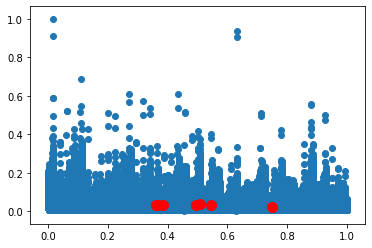

In [240]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=30, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_transformed)
plt.scatter(data_transformed[:,0],data_transformed[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()